# Modeling Distributions

**Empirical Distributions**: distribution of values in a *sample*.
  * Empirical measure is a random measure of arising from a particular realization of a *finite* sequence of random variables (*sample*).
  * *Empirical*: concerned with or verifiable by observation or experience rather than theory.

### Python Package: statsmodels (ECDF)

http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.distributions.empirical_distribution.ECDF.html

`from statsmodels.distributions.empirical_distribution import ECDF`

In [11]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

`y` attribute of `ecdf` object extracts the empirical CDF (probability) values.

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF([3,3,1,4])

ecdf.y #empirical CDF probabilities

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

#### Example: Checking ECDF of *New* values per existing sample
The ECDF object has been created previously. A *new* sequence of values is passed through the object. The probability (empirical CDF) values will be calculated for these new values *based on the values of the original sample*.

In other words, the probability of each new value will be based on the percentage of values from the original sample that's lower.

| New Value | >= (Old Sample) | Probability|
| :--------:| :--------------:| :------:|
|3 | 3,3,1| 0.75|
|55|3,3,1,4| 1.0|
|0.5| N/A | 0.0|
|1.5| 1| 0.25|


In [13]:
ecdf([3, 55, 0.5, 1.5])

array([ 0.75,  1.  ,  0.  ,  0.25])

## **Analytic Distribution**: a distribution characterizd by a *CDF is an analytic function*.
  * alternative distribution
  * can be used to model empirical distributions
  * are often good models of more complex **empirical distributions**
  
A **model** is a simplification that leaves out unneeded details.  

This chapter presents common **analytic distributions** and uses them to model data from a variety of sources.

## Exponential Distribution

**CDF of Exponential Distribution**: CDF(x) = 1 - e<sup>-λx</sup>
  * Parameter λ: determines the *shape* of the distribution
  * **Plot**: exponential curve (logarithmic)
  
**Mean of Exponential Distribution** = 1/λ

### Python Package: SciPy (scipy.stats.expon)
`scipy.stats.expon(x, loc=0, scale = 1/λ)`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Figure below shows what CDFs of *exponential distributions* with various parameters (λ: 2, 1, 0.5)

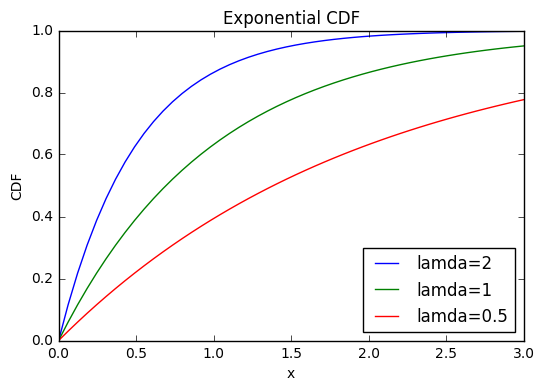

In [14]:
exp_x = np.linspace(0,3.0,50)

# CDF of Exponential Distribution
exp_cdf2 = scipy.stats.expon.cdf(exp_x, scale=1.0/2) #lamda=2
exp_cdf1 = scipy.stats.expon.cdf(exp_x, scale=1.0/1) #lamda=1
exp_cdf05 = scipy.stats.expon.cdf(exp_x, scale=1.0/0.5) #lamda=0.5

# Plot
plt.plot(exp_x, exp_cdf2, label='lamda=2')
plt.plot(exp_x, exp_cdf1, label='lamda=1')
plt.plot(exp_x, exp_cdf05, label='lamda=0.5')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Exponential CDF')
plt.legend(loc='lower right')
plt.show()

*Real World Applications*: exponential distributions come up when we look at a series of events & measure *the times between events* (**interarrival times**).
  * If the events are *equally likely* to occur at any time, the distribution of interarrival times tends to look like an exponential distribution
  * Distribution shape of empirical CDF will resemble that of an exponential distribution.

**Interarrival Time**: time elapsed between 2 events

#### Example: Interarrival Time of Births
On, December 18, 1997, 44 babies were born in a hospital. The time of birth for all babies were reported.

Columns:
  * **minutes**: time of birth converted since midnight
  * **diffs**: difference between consecutive birth times (unit= minutes)
  * **cdf**: the distribution of these interarrival times

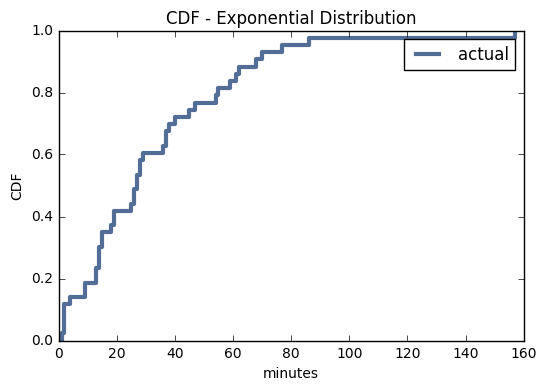

In [15]:
from analytic import ReadBabyBoom #thinkstats2 py file
import thinkstats2
import thinkplot

df = ReadBabyBoom()
diffs = df['minutes'].diff() # calculate diffs
cdf = thinkstats2.Cdf(diffs, label='actual') # calculate CDF of interarr

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF', 
               title='CDF - Exponential Distribution')

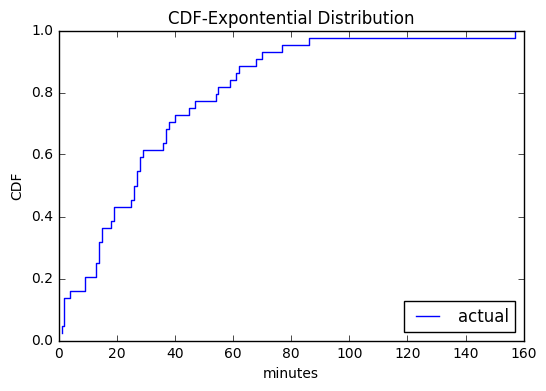

In [16]:
ecdf=ECDF(diffs)
plt.step(ecdf.x,ecdf.y, label='actual')
plt.xlabel('minutes')
plt.ylabel('CDF')
plt.title('CDF-Expontential Distribution')
plt.legend(loc='lower right')
plt.show()

**Interpretation**: Figure shows the CDF distribution, which *has* the general shape of an **exponential distribution**.

  * Plot CDF of consecutive differences to determine if the plot's shape resembles that of an exponential distribution.


But how can we tell? Solution: Plot **Complementary CDF (CCDF)**  

### CCDF 
** *log* y = -λ*x* **
  * `1 - CDF(x)` on a *log-y scale*  
  * for data with an *exponential distribution*, the result should be a *straight line*.
  
Deriving the CCDF function:

  1. CDF equation: **y = e<sup>-λx</sup>**
  2. Take the *log* of both side yield: ** *log* y = -λ*x* **

So on a log-y scale, the CCDF is a *straight line w/ slope **-λ** *.

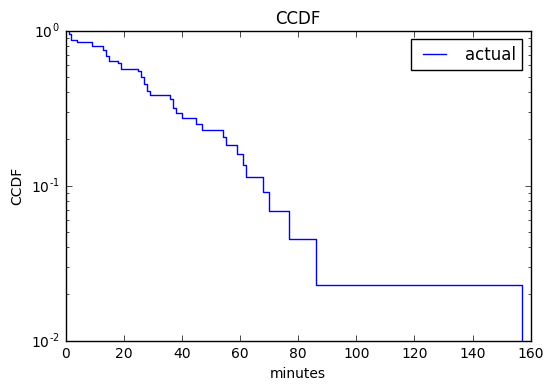

In [17]:
ecdf=ECDF(diffs)
ccdf = [1.0-p for p in ecdf.y] # CCDF = 1 - CDF(x)
plt.step(ecdf.x, ccdf, label='actual')
plt.xlabel('minutes')
plt.ylabel('CCDF')
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.yscale('log')
plt.title('CCDF')
plt.legend(loc='upper right')
plt.show()

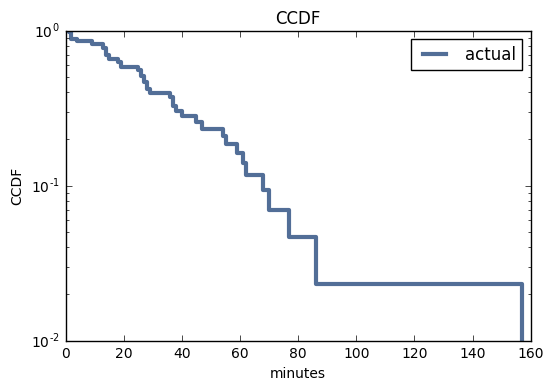

In [18]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes', ylabel='CCDF', yscale='log',
              title='CCDF')

**Interpretation**: The graph is *not exactly straight*, indiciating that the **exponential distribution is not a perfect model for this data**.

The underlying assumption (that a birth is equally likely at any time of day) is *not exactly true*

Nevertheless, it still may be reasonable to model this dataset with an exponential distribution. With such simplification, we can summarize the distribution with a single parameter (λ).
  * **λ** can be interpreted as a *rate* - the number of events that occur (on average) in a unit of time.

#### Conclusion (Example)
Example: 44 babies born in 24 hours 
   * **λ** = 0.0306 births per minute
   * **Exponential Distribution Mean (1/λ)** = 32.7 minutes
   * Exponential Distribution is not a perfect model (*as indicated by CCDF plot*)


## Normal Distribution (Gaussian)

**Normal Distribution**, also called Gaussian, is commonly used because it describes many phenomena (ubiquitous).

It's characterized by 2 parameters: 
  * mean (**μ**)
  * standard devistion (**σ**)

The normal distribution with **μ** = 0 & **σ** = 1 is called the **standard normal distribution**.

**Plot**: sigmoid curve

### Python Package: SciPy (**scipy.stats.norm**)
  * object representing a normal distribution
  * provides a method, **cdf**, that evaluates the **standard normal CDF**

`scipy.stats.norm.cdf(x, loc=0, scale=1)` #default normal distribution
  * **loc**: specifies the mean
  * **scale**: specifies the standard deviation

In [19]:
import scipy.stats
scipy.stats.norm.cdf(0)

0.5

**Interpretation**: The median of the standard normal distribution is 0 (*the same as the mean*), and half of the values fall below the median. Thus, CDF(0) = 0.5.

In [20]:
cdf = scipy.stats.norm.cdf([0,1,2], 1, 0.5) #CDF Values
cdf

array([ 0.02275013,  0.5       ,  0.97724987])

### Normal Distribution CDF Plot

Plots of CDFs for *normal distributions* with a range of parameters (mean/loc, standard deviation/scale).

*Sigmoid shape* is recognizable characteristic of a normal distribution

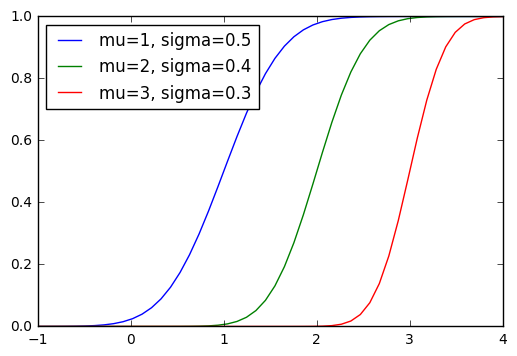

In [21]:
x = np.linspace(-1, 4, 50)

#Plot
plt.plot(x, scipy.stats.norm.cdf(x, loc=1, scale=0.5),
        label = 'mu=1, sigma=0.5')
plt.plot(x, scipy.stats.norm.cdf(x, loc=2, scale=0.4),
        label = 'mu=2, sigma=0.4')
plt.plot(x, scipy.stats.norm.cdf(x, loc=3, scale=0.3),
        label = 'mu=3, sigma=0.3')
plt.legend(loc='upper left')
plt.show()

### Example: NSFG Birth Weights
#### How to know if Normal Distribution is a good model for a dataset?

In the previous chapter, the distribution of birth weights in the NSFG dataset was explored. The **empirical CDF** AND **CDF of a normal distribution** of weights for all live births show the *same mean & variance*.

Hence, the **normal distribution** is a good model for this dataset. If we summarize the distribution with the parameters (μ=7.28, σ=1.24), the resulting error (*difference b/w model & data*) is small.

**Exception**: Focusing on a segment (10th percentile)  
There is a discrepancy between the **empirical** (data) and **normal distribution** model *below the 10th percentile*. There are more light babies (*empirical*) than we would expect in a normal distribution (*model*) within this sample.

Thus, if we are specifically interested in pre-term babies, it's important to get this *part* of the distribution right and the normal distribution model is not appropriate.

In [22]:
def EvalCDF(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

#### Empirical CDF
Based off of sample

In [23]:
import nsfg

preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
birthwgt = live['totalwgt_lb'].sort_values()

emp_cdf = []
for value in birthwgt:
    emp_cdf += [EvalCDF(birthwgt, value)]
emp_cdf = pd.Series(emp_cdf, name='CDF')

emp_birthwgt = pd.concat([birthwgt, emp_cdf], axis=1)
emp_birthwgt.head()

,totalwgt_lb,CDF
0,8.8125,0.000109
1,7.8750,0.000219
2,9.1250,0.000328
3,7.0000,0.000437
4,6.1875,0.000656


##### Alternative Method
Use statsmodels ECDF function

In [24]:
emp_birthwgt2 = ECDF(birthwgt)
emp_birthwgt2.y

array([  0.00000000e+00,   1.09313511e-04,   2.18627022e-04, ...,
         9.99781373e-01,   9.99890686e-01,   1.00000000e+00])

#### CDF of Normal Distribution

In [25]:
x = np.linspace(0, 16, 50)
norm_cdf = np.array(scipy.stats.norm.cdf(x, loc=7.28, scale=1.24))

norm_birthwgt = pd.DataFrame(np.column_stack([x, norm_cdf]), columns=['totalwgt_lb', 'norm_CDF'])
norm_birthwgt.head()

,totalwgt_lb,norm_CDF
0,0.000000,2.166293e-09
1,0.326531,1.025541e-08
2,0.653061,4.538220e-08
3,0.979592,1.877519e-07
4,1.306122,7.263192e-07


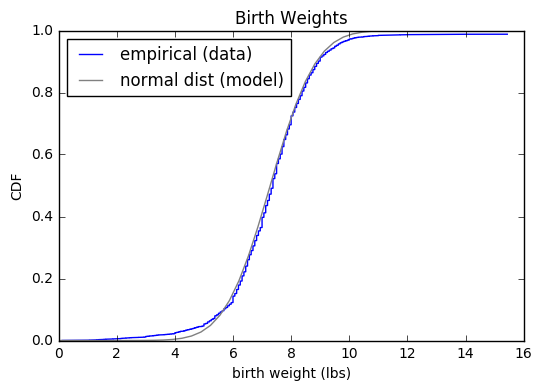

In [26]:
import nsfg

# empirical CDF
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
birthwgt = live['totalwgt_lb'].sort_values()

# emp_cdf = []
# for value in birthwgt:
#     emp_cdf += [EvalCDF(birthwgt, value)]

e_birthwgt=ECDF(birthwgt)

# CDF of Normal Distribution
x = np.linspace(0, 16, 50) 
norm_cdf = scipy.stats.norm.cdf(x,  # random values based mean & standard dev of sample
                                loc=7.28, # sample mean
                                scale=1.24) # sample std

# Plot
fig = plt.figure()
plt.plot(birthwgt, e_birthwgt.y[1:], # y=e_birthwgt.y[1:]=emp_cdf
       label = 'empirical (data)')
plt.plot(x, norm_cdf,
         color = 'grey',
        label = 'normal dist (model)')
plt.title('Birth Weights')
plt.xlabel('birth weight (lbs)')
plt.ylabel('CDF')
plt.legend(loc='upper left')
plt.show()
plt.close(fig)

## Normal Probability Plot

**Expected Plot/Shape**: straight line with intercept (**μ**) and slope (**σ**).


For the **exponential distribution** (and a few others), there are *simple transformations* we can use to test whether an `analytic distribution` is a good model for a dataset.
  * Example: **CCDF** for CDF of *exponential distribution*

There is *NO such transformation* for the **normal distribution**. An alternative is the **normal probability plot**.

2 ways to generate the plot:
  1. https://en.wikipedia.org/wiki/Normal_probability_plot (Hard way)
  2. Easy way (see below).
  
### Generate Plot
  1. Sort the values in the sample
  2. From a standard normal distribution (μ = 0 and σ = 1), generate a random sample with the *same size as the sample*. Then sort it.
  3. Plot the sorted values from the **sample** versus the **random values**.

If the distribution of the sample is *approximately normal*, the result is a **straight line** with the intercept (μ) and slope (σ).

Plot for random samples from normal distributions.

`x-axis = random values` (standard dev from mean)  
  * random values chosen based off of a normal distribution (`rand.normal`)   

`y-axis = sample values (original)`

**Interpretations**:
  * lines are approximately straight
  * values in *tails* deviating more than values near the *mean*

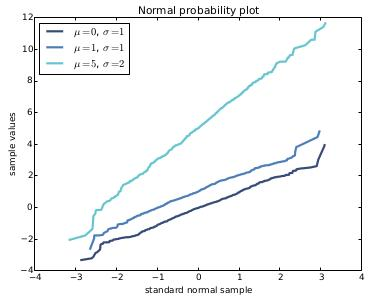

In [27]:
from IPython.display import Image, display
import platform

if platform.system()=='Linux':
    display(Image(filename='/media/cpnguyen/Windows8_OS/Users/Calvin/Desktop/HS 699/code/npp.jpg'))
if platform.system()=='Windows':
    display(Image(filename='C:\Users\Calvin\Desktop\HS 699\code\np.jpg'))

In [28]:
def NormalProbability(sample):
    """Generates data for a normal probability plot.

    sample: sequence of values

    returns: sorted numpy arrays sample, random
    """
    n = len(sample)
    random = np.random.normal(0, 1, n) # random values chosen based off of normal distribution (~std from mean)
    random.sort()
    
    sample_copy = sample.copy()
    sample_copy.sort()

    return random, sample_copy

In [29]:
birthwgt = live['totalwgt_lb'].sort_values()
x, rand_bwgt = NormalProbability(birthwgt)

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [30]:
def FitLine(xs, inter, slope):
    """Fits a line to the given data.

    xs: sequence of x

    returns: tuple of numpy arrays (sorted xs, fit ys)
    """
    xs_copy = xs[:]
    fit_xs = np.sort(xs_copy)
    fit_ys = inter + slope * fit_xs # y=mx+b
    return fit_xs, fit_ys


def MakeNormalPlot(feature):
    import matplotlib.pyplot as plt
    
    mean = feature.mean()
    std = feature.std()
    xs = [-4, 4]
    
    # normal distribution line (model)
    fitted_xs, fitted_ys = FitLine(xs, inter=mean, slope=std) #represent line

    # normal probability plots
    fig = plt.figure()
    plt.plot(fitted_xs, fitted_ys, color='grey', label='model')
    
    xs, ys = NormalProbability(feature) # xs: random, ys: original sample
    plt.plot(xs, ys, label=' all live')
    plt.xlabel('Standard Deviations from Mean')
    plt.ylabel('Birth Weight (lbs)')
    plt.title('Normal Probability Plot')
#     plt.legend(loc='upper left')
#     plt.show()
#     plt.close(fig)

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


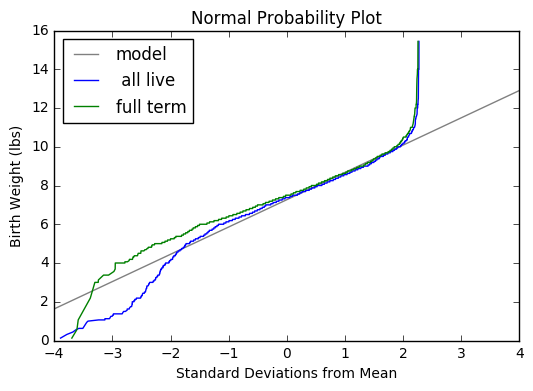

In [31]:
birthwgt = live['totalwgt_lb']
MakeNormalPlot(birthwgt)

fterm_wgt = live[live['prglngth'] > 36].totalwgt_lb
fterm_xs, fterm_ys = NormalProbability(fterm_wgt)

plt.plot(fterm_xs, fterm_ys, label='full term')
plt.legend(loc='upper left')
plt.show()
plt.close(fig)

**Plot**  
Plot shows results for all *live births* & *full term births* (pregnancy length > 36 weeks). 

1. `model` = FitLine (takes sequence of values, intercept, & slope evaluate a line represented within the given parameters.
2. `all live` = Normal Probability (random values based off of sample values) of all live births.
3. `full term` = Normal Probability of full-term pregnancies.

**Interpretation**:
  * Both curves match the model *near the mean* and *deviate in the tails*.
  * Heaviest babies are heavier than what the `model` expects.
  * Lightest babies are lighter than what the `model` expects.
    
    
    
  * Selecting only `full term births`, some of the lightest weights were removed. Thus, reducing the discrepancy in the lower tail of the distribution.
  * Plot suggests that the `normal model` describes the distribution well within a few standard deviations from the mean, *but not in the tails*. (Whether the `model` is good enough for practical purposes depend on the purposes).

## Lognormal Distribution

**Lognormal Distribution**: the values' distribution if their logarithms have a normal distribution.
  * CDF of lognormal distribution is the same as the CDF of the **normal distribution**, *but with `log x` substituted for x*.
  
**CDF<sub>lognormal</sub>(*x*) = CDF<sub>normal</sub>(log *x*)**

**Parameters**:
  * **μ** ≠ mean
  * **σ** ≠ standard deviation
  
  * **mean**<sub>lognormal</sub> = exp(μ + σ<sup>2</sup> /2)
  * **standard deviation**<sub>lognormal</sub> = refer to http://wikipedia.org/wiki/Log-normal_distribution 
  
### Getting Logarithmic Values
To get logarithmic (`log10`) values for a given sample, apply **Numpy's** log10 function:  
  
`numpy.log10(x)`

https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.log10.html

### Python Package: SciPy (scipy.stats.lognorm.cdf)
`scipy.stats.lognorm.cdf(x, loc=μ, scale=σ)`

https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.lognorm.html

### Plotting Lognromal Distributions
If a sample is *approximately lognormal* and you plot its CDF on a `log-x scale`, it will have the **characteristic shape of a normal  distribution**.

### Test: Does Sample Fit a Lognormal Model?
To test how well a sample fits a lognormal model, you can make a **normal probability plot** * using the **log** of values in the sample*.

### Example: BRFSS - Weight
In the Behavioral Risk Factor Surveillance System annual survey conducted by the National Center for Chronic Disease Prevention and Health Promotion, 414, 509 respondents were interviewed about their demographics, health, & health risks. Among the data collected was weight in kg.

In [32]:
from brfss import *

risk = ReadBrfss()

398, 484 respondents for weight in kg.

In [33]:
risk.wtkg2.notnull().value_counts()

True     398484
False     16025
Name: wtkg2, dtype: int64

In [34]:
weights = risk.wtkg2.dropna() #drop nans
log_weights = np.log10(weights) #logarthmic values

#### Plot Weights on Linear & Log Scales

1. **Left Fig**: shows distribution of adult weights on a *linear* scale with a **normal model.**
2. **Right Fig**: shows same distribution on a *log* scale with a **lognormal model**.

**Conclusions**:
  * **Lognormal model** is a better fit, but this representation of data does not make the difference particularly dramatic
    * differences are more apparent with Normal Probability Plots

In [35]:
ecdf_wgt = ECDF(weights)
print ecdf_wgt.x

[   -inf   20.     22.73 ...,  295.45  300.    309.09]


/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log10
/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in log10


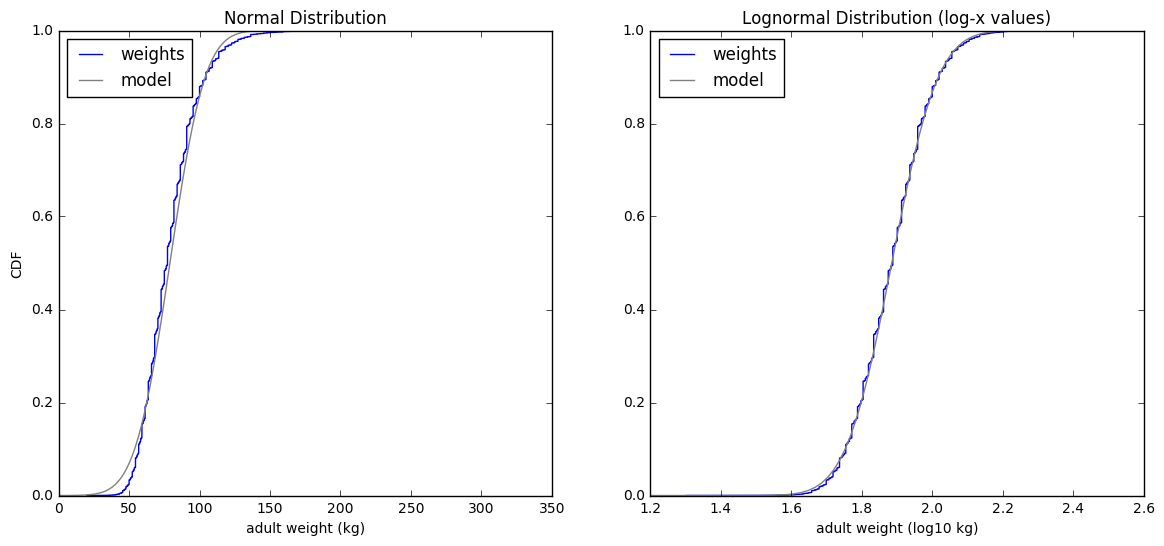

In [36]:
# Empirical CDFs

# emp_cdf_wgt = []
# for value in weights:
#     emp_cdf_wgt += [EvalCDF(weights, value)]

#Linear (normal eCDF)
ecdf_wgt = ECDF(np.sort(weights[1:-1]))
#Logarthmic (log eCDF)
ecdf_logwgt = ECDF(np.sort(log_weights[1:-1]))


# CDF of Normal Distribution
x = np.linspace(0, 200, 100) # random values
## normal CDF
norm_cdf_wgt = scipy.stats.norm.cdf(x, loc=weights.mean(),
                                   scale=weights.std())
## lognormal CDF (log-x values)
norm_cdf_logwgt = scipy.stats.norm.cdf(np.log10(x), loc=log_weights.mean(),
                                   scale=log_weights.std())

# Plot
fig = plt.figure(figsize=(14,6))
# Normal Distribution/Scale (normal values)
plt.subplot(1,2,1)
plt.plot(ecdf_wgt.x, ecdf_wgt.y, label = 'weights') # empirical CDF
plt.plot(x, norm_cdf_wgt, color = 'grey', label = 'model') # CDF normal distribution
plt.xlabel('adult weight (kg)')
plt.ylabel('CDF')
plt.title('Normal Distribution')
plt.legend(loc='upper left')

# Lognormal Distribution/Scale (log-values)
plt.subplot(1,2,2)
plt.plot(ecdf_logwgt.x, ecdf_logwgt.y, label = 'weights') # empirical CDF of log values
plt.plot(np.log10(x), norm_cdf_logwgt, color = 'grey', label = 'model') # CDF normal distribution of log values
plt.xlabel('adult weight (log10 kg)')
# plt.xscale('log')
plt.xlim([1.2,2.6])
plt.title('Lognormal Distribution (log-x values)')
plt.legend(loc='upper left')
plt.show()
plt.close(fig)

n, mean, std 398484 78.595995657 17.7545551918
n, mean, std 398484 1.88466071373 0.0962358025915


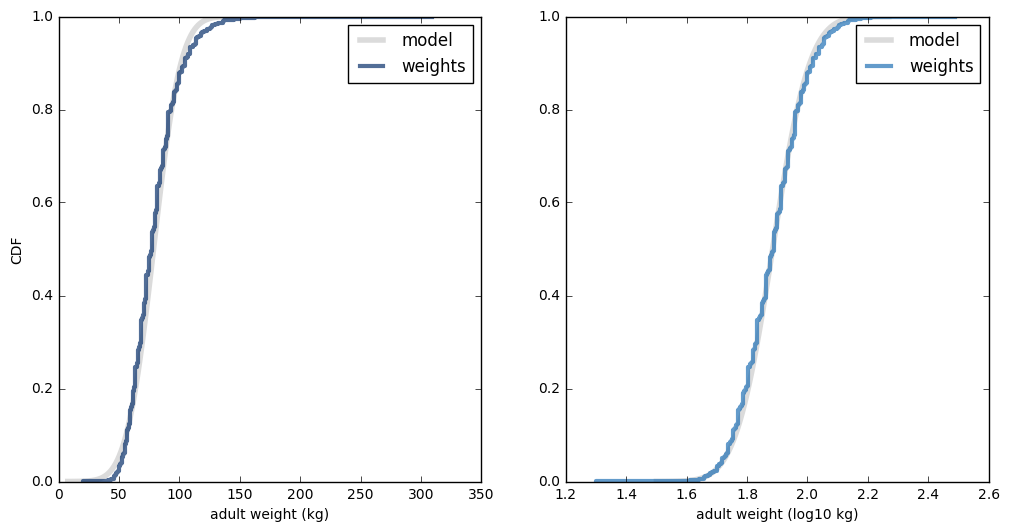

In [37]:
import thinkplot

thinkplot.PrePlot(cols=2)
MakeNormalModel(weights)
thinkplot.Config(xlabel='adult weight (kg)', ylabel='CDF')

thinkplot.SubPlot(2)
MakeNormalModel(log_weights)
thinkplot.Config(xlabel='adult weight (log10 kg)')
thinkplot.Show()

### Plot Normal Probability Plots on Linear & Log Scales
Normal Probability Plots for adult weights for their logarithms log<sub>10</sub>*w*.

**Conclusions**:
  * It is more apparent in these plots (than linear & log scales) that the data deviate substantially from the `normal model`. 
  * `Lognormal model` is a good match for the data!

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


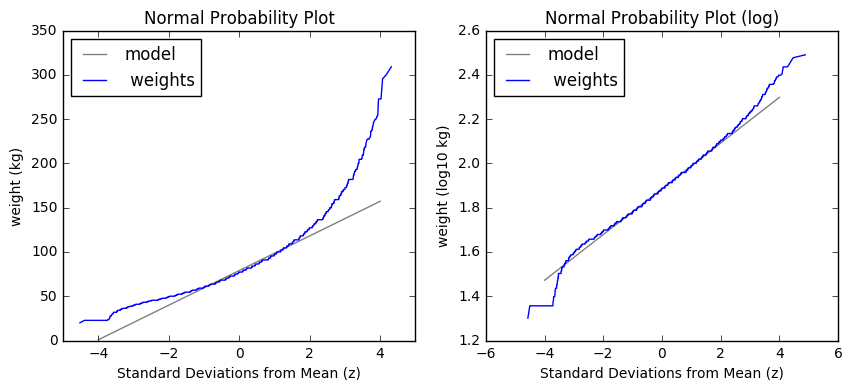

In [38]:
mean = weights.mean()
std = weights.std()
xs = [-4, 4]

log_mean = log_weights.mean()
log_std = log_weights.std()

# normal distribution line (model)
fitted_xs, fitted_ys = FitLine(xs, inter=mean, slope=std) #represent line
lfitted_xs, lfitted_ys = FitLine(xs, inter=log_mean, slope=log_std) #represent line (log)

# empirical Normal Probability
xs, ys = NormalProbability(weights)
logxs, logys = NormalProbability(log_weights)

#Plot
plt.figure(figsize=(10,4))
# Normal Probability Plot (Normal Distribution)
plt.subplot(1,2,1)
plt.plot(fitted_xs, fitted_ys, color='grey', label='model')
plt.plot(xs, ys, label=' weights')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('weight (kg)')
plt.title('Normal Probability Plot')
plt.legend(loc='upper left')

# Normal Probability Plot (log)
plt.subplot(1,2,2)
plt.plot(lfitted_xs, lfitted_ys, color='grey', label='model')
plt.plot(logxs, logys, label=' weights')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('weight (log10 kg)')
plt.title('Normal Probability Plot (log)')
plt.legend(loc='upper left')
plt.show()
plt.close(fig)

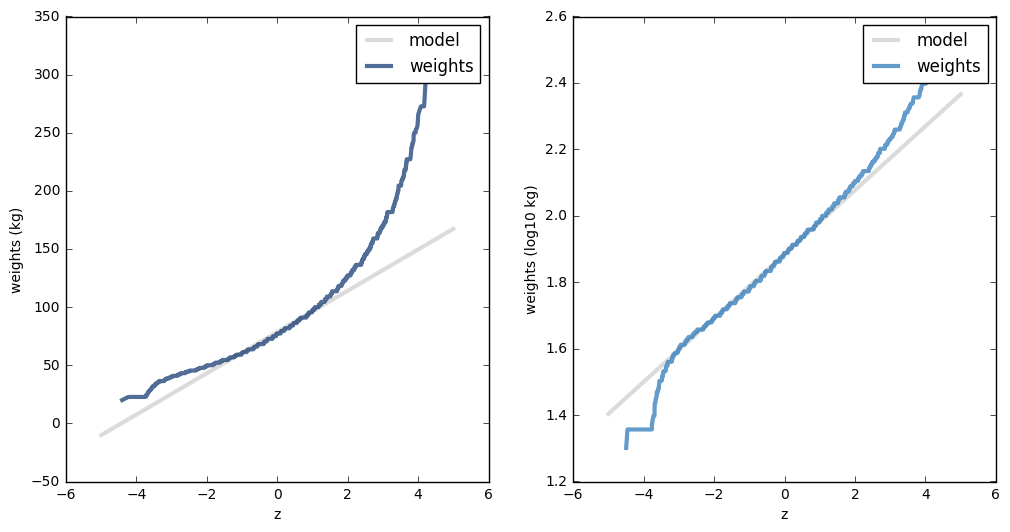

In [39]:
thinkplot.PrePlot(cols=2)
MakeNormalPlot(weights)
thinkplot.Config(xlabel='z', ylabel='weights (kg)')

thinkplot.SubPlot(2)
MakeNormalPlot(log_weights)
thinkplot.Config(xlabel='z', ylabel='weights (log10 kg)')

thinkplot.Show()

## Pareto Distribution
  * named after economist Vilfredo Pareto -- used it to descirbe distribution of wealth.
  * used to describe phenomena in the natural & social sciences (e.g. sizes of cities/towns).

### CDF Equation
**CDF** of the Pareto distribution is:
**CDF(*x*) = 1 - ( *x* / *x*<sub>m</sub>)<sup>-α</sup>**

#### Parameters
  * ***x*<sub>m</sub>** & **α** determine the *location* & *shape* of the distribution.
    * ***x*<sub>m</sub>**: minimum possible value

### Python Package: Scipy (scipy.stats.pareto)
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

`scipy.stats.pareto.cdf(x, b, loc=0, scale = 1)`
  * **x** = sample
  * **scale** = x<sub>m</sub> (x-min)
  * **b** = alpha
 




In [40]:
def RenderParetoCdf(xmin, alpha, low, high, n=50):
    """Generates sequences of xs and p_cdf for a Pareto CDF.
    Manual version of scipy.stats.pareto.cdf()
    
    xmin: parameter
    alpha: parameter
    low: float
    high: float
    n: number of points to render

    returns: numpy arrays (xs, p_cdf)
    """
    if low < xmin:
        low = xmin
    xs = np.linspace(low, high, n)
    p_cdf = 1 - (xs / xmin) ** -alpha
    #p_cdf = stats.pareto.cdf(xs, scale=xmin, b=alpha)
    return xs, p_cdf

In [41]:
low = 0.2
high = 10
xmin = 0.2

if low < xmin:
    low = xmin

x = np.linspace(low, high, 50)
p_cdf05 = scipy.stats.pareto.cdf(x, scale=xmin, b=0.5)
p_cdf1 = scipy.stats.pareto.cdf(x, scale=xmin, b=1)
p_cdf2 = scipy.stats.pareto.cdf(x, scale=xmin, b=2)

### Plotting CDFs of Pareto Distribution
Simple visual test indicates whether an *empirical distribution* fits a *Pareto distribution*.

#### Example: CDFs of Pareto Distributions with Different Parameters (alpha)

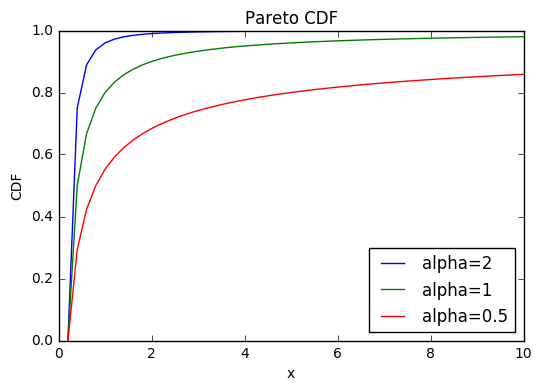

In [42]:
fig = plt.figure()
plt.plot(x, p_cdf2, label='alpha=2')
plt.plot(x, p_cdf1, label='alpha=1')
plt.plot(x, p_cdf05, label='alpha=0.5')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Pareto CDF')
plt.legend(loc='lower right')
plt.show()
plt.close(fig)

### CCDF (log-log scale)
On a `log-log scale`, the CCDF looks like a straight line.

Steps:
  1. If you plot the CCDF of a sample from a Pareto distribution on a linear scale, you expect this function:  
  **y = (*x* / *x*<sub>m</sub>)<sup>-α</sup>**
  2. Taking the *log* of both sides yields:  
  ** log y = - α (log *x* - log *x*<sub>x</sub>)**
  
Plotting log *y* versus log *x*, will look like a **straight line** with: 
  * slope: - α
  * intercept: α log *x*<sub>m</sub>.

### Example U.S. Census Bureau - Population of Cities & Towns

#### CCDF of Populations on `log-log scale`

The largest 1% of cities and towns, below 10<sup>-2</sup>, fall along a straight line. Therefore, concludes that the **tail** of this distribution fits a **Pareto model**.

('Number of cities/towns', 19515)


/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


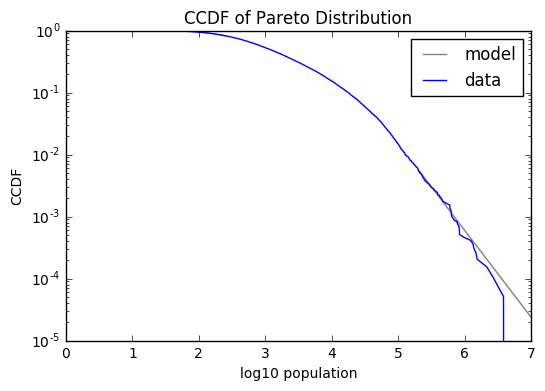

In [43]:
from populations import *

pops = ReadData()
print('Number of cities/towns', len(pops))

# Empirical CDF
log_pops = np.log10(pops)

pop_ecdf = ECDF(pops)
log_ecdf = ECDF(log_pops)

pp = [1.0 - p for p in log_ecdf.y] # complementary probability (CDF)

# pareto plot (model)
x_p = np.linspace(0,1e7,50) # random values to draw model
cdf_p = scipy.stats.pareto.cdf(x_p, scale=5000, b=1.4)
plt.plot(np.log10(x_p), 1-cdf_p, # CCDF (1-CDF(x)) 
         label='model', color='grey') # Pareto (model)
plt.plot(log_ecdf.x, pp, label='data') # empirical
plt.xlabel('log10 population')
plt.ylabel('CCDF')
plt.yscale('log') #log scale
plt.title('CCDF of Pareto Distribution')
plt.legend(loc='upper right')
plt.show()

('Number of cities/towns', 19515)


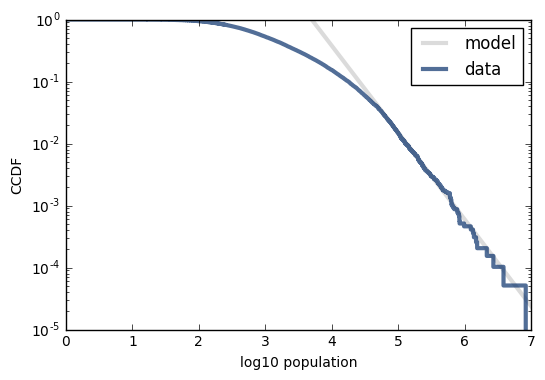

In [44]:
from populations import *
pops = ReadData()
print('Number of cities/towns', len(pops))

log_pops = np.log10(pops)
cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log')


thinkplot.Show()

#### CDF of Populations (Lognormal & Normal Probability Plot)
On the contrary, the **lognormal distribution** also models the data well.
Both plots (`lognormal` and `normal probability plot` (complementary)) show good agreement between the data and the model.

/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log10
/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/home/cpnguyen/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


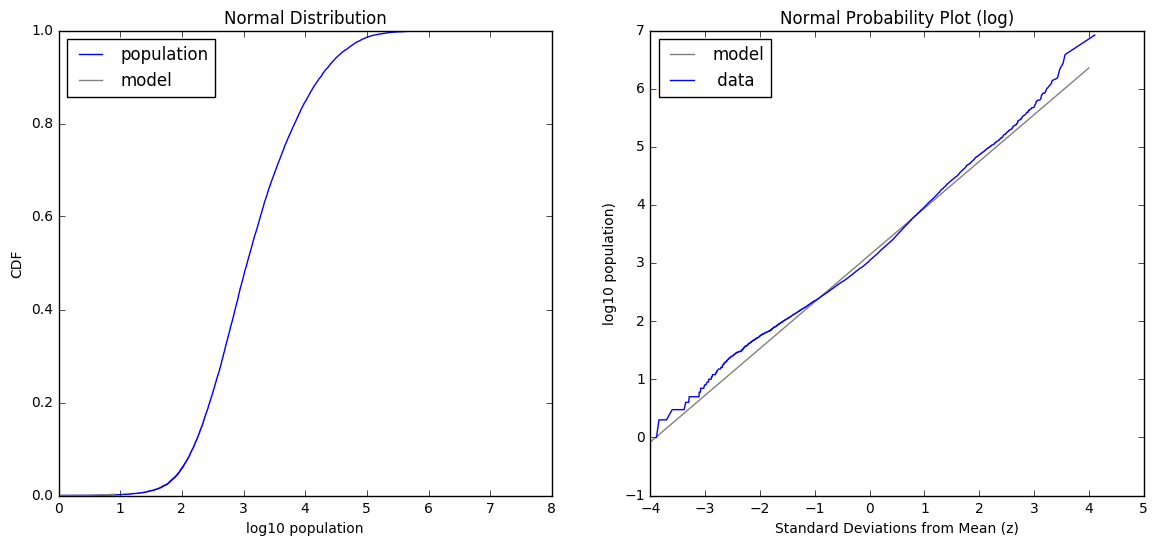

In [45]:
mu_pop, sigma_pop = log_pops.mean(), log_pops.std()

#Logarthmic (log eCDF)
ecdf_logpop = ECDF(np.sort(log_pops))

# CDF of Normal Distribution
x = np.linspace(0, 8, 50) # random values
## lognormal CDF (log-x values)
norm_cdf_logpop = scipy.stats.norm.cdf(np.log10(x), loc=mu_pop,
                                   scale=sigma_pop)

fig = plt.figure(figsize=(14,6))
# Lognormal Distribution/Scale (log-values)
plt.subplot(1,2,1)
plt.plot(ecdf_logpop.x, ecdf_logpop.y, label = 'population') # empirical CDF
plt.plot(np.log10(x), norm_cdf_logpop, color = 'grey', label = 'model') # CDF normal distribution
plt.xlabel('log10 population')
plt.ylabel('CDF')
plt.xlim([0,8])
plt.ylim([0,1.0])
plt.title('Normal Distribution')
plt.legend(loc='upper left')


# normal distribution line (model)
fitx_logpop, fity_logpop = FitLine([-4, 4], inter=mu_pop, slope=sigma_pop) #represent line (log)

# empirical Normal Probability
rand_logpop, sample_logpop = NormalProbability(log_pops)

# Normal Probability Plot (log)
plt.subplot(1,2,2)
plt.plot(fitx_logpop, fity_logpop, color='grey', label='model')
plt.plot(rand_logpop, sample_logpop, label=' data')
plt.xlabel('Standard Deviations from Mean (z)')
plt.ylabel('log10 population)')
plt.title('Normal Probability Plot (log)')
plt.legend(loc='upper left')
plt.show()
plt.close(fig)

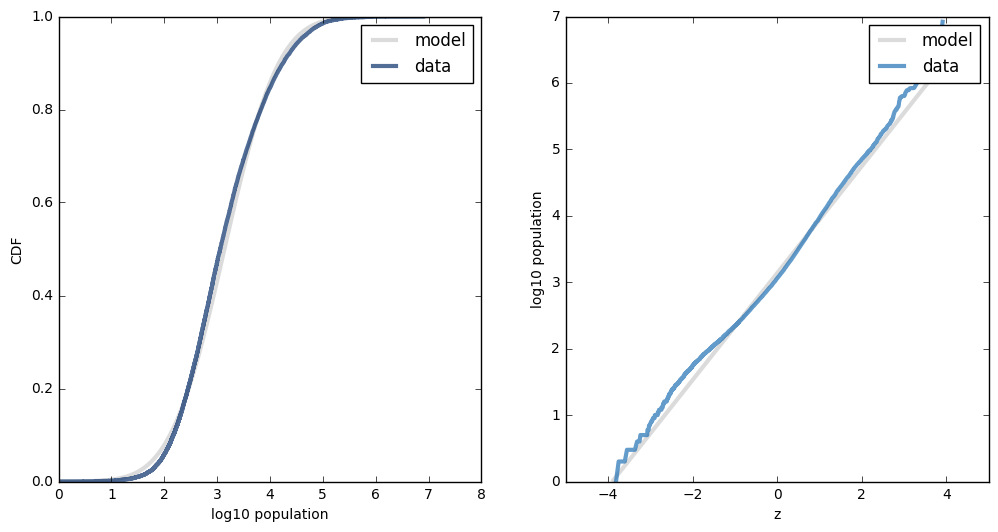

In [46]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF')

thinkplot.SubPlot(2)
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='z',
                 ylabel='log10 population',
                 xlim=[-5, 5])
thinkplot.Show()

### Conclusion

Neither model is perfect.

1. **Pareto Model** only applies to the largest 1% of cities (tail of the distribution). Hence, it's a better fit for that *part* of the distribution.
2. **Lognormal Model** is a better fit for the other 99%.

Which model is appropriate *depends on **which part of the distribution is relevent** *.

## Generating Random Numbers

**Analytic CDFs** can be used to generate random numbers with a given distribution function: 
`p = CDF(x)`

Generate random values with the *appropriate* distribution by *computing the **inverse CDF*** and choosing *p* from a uniform distribution between 0 and 1 [0, 1].  
`x = I-CDF(p)`

#### Example: Random Values from CDF of an Exponential Distribution
  1. CDF<sub>exp</sub>:  
  ** *p* = 1 - e<sup>-λ*x*</sup>**
  2. Solve for *x* yields:  
  ** *x* = - log(1-*p*)/λ**
  
###### `expovariate` function
`expovariate` takes `lam` and returns a random value chosen from the **exponential distribution** with parameter `lam`.

*Note*:
  * `lam` parameter represents λ, but `lambda` is a key word in Python (avoid variable conflict).
  *  `log 0` is undefined. The implementation of `random.random` can return 0 *but not 1*. So 1-*p* can be 1 but not 0. Thus, log(1-p) is always defined.
  

In [47]:
def expovariate(lam):
    import random
    p = random.random()
    x = -math.log(1-p) / lam
    return x

In [48]:
expovariate(2)

0.2654410622487822

## Why Model?

Many real world phenomena can be modeled with *analytic distributions*. Like all models, analytic distributions are abstractions, which means they *leave out details considered to be irrelevant*.
  * For example, an observed distribution may have measurement errors specific to the sample. Analytic models *smooth out these idiosyncrasies*.

#### Data Compression
Analytic models are a form of **data compression**. When a model *fits a dataset well*, a small set of parameters can summarize a large amount of data.

#### Important Disclaimer: All Models are Imperfect
It's important to remember that *all* models are **imperfect**. Real world data never fits an analytic distribution perfectly.
  * Claims like `distribution of human height is normal` or `distribution of income is lognormal` may be mostly true. Yet, these claims cannot be taken literally and completely true as there are always differences between the real world and mathematical models.
  
Models are useful to capture *relevant aspects* of the real world & *leave out unneeded details*. What is **"relevant"** or **"unneeded"** depends on what the model is used for.